## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Wed Jul 17 23:16:53 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  On   | 00000000:08:00.0  On |                  N/A |
| 43%   57C    P0    32W / 120W |   1062MiB /  6078MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x / 255. -0.5 )*2.0
    if flatten:
        x = x.reshape((len(x), -1))
    return x
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0717 23:17:09.982620 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 23:17:09.996363 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 23:17:09.998177 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0717 23:17:12.845712 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 23:17:12.852817 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0717 23:17:45.629049 139620787275584 deprecation.py:323] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0717 23:17:45.658854 139620787275584 deprecation_wrapper.py:119] From /home/jianhao/opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.6717 - acc: 0.4074 - val_loss: 1.5629 - val_acc: 0.4547
Epoch 2/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.4460 - acc: 0.4913 - val_loss: 1.4370 - val_acc: 0.4867
Epoch 3/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.3199 - acc: 0.5366 - val_loss: 1.4264 - val_acc: 0.4987
Epoch 4/100
50000/50000 [==============================] - 1s 29us/step - loss: 1.2237 - acc: 0.5735 - val_loss: 1.3889 - val_acc: 0.5102
Epoch 5/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.1356 - acc: 0.6022 - val_loss: 1.3714 - val_acc: 0.5280
Epoch 6/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.0461 - acc: 0.6319 - val_loss: 1.3774 - val_acc: 0.5297
Epoch 7/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.9702 - acc: 0.6587 - val_loss: 1.4056 - 

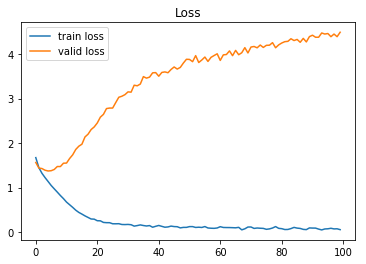

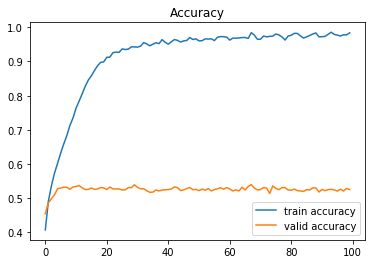

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
###

In [19]:
model2 = build_mlp(input_shape=x_train.shape[1:],output_units = 10,num_neurons=[512, 256, 128,64,32])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 36us/step - loss: 1.7273 - acc: 0.3898 - val_loss: 1.5433 - val_acc: 0.4635
Epoch 2/100
50000/50000 [==============================] - 2s 30us/step - loss: 1.4778 - acc: 0.4799 - val_loss: 1.4542 - val_acc: 0.4861
Epoch 3/100
50000/50000 [==============================] - 1s 30us/step - loss: 1.3598 - acc: 0.5211 - val_loss: 1.4039 - val_acc: 0.5078
Epoch 4/100
50000/50000 [==============================] - 1s 30us/step - loss: 1.2638 - acc: 0.5554 - val_loss: 1.4046 - val_acc: 0.5148
Epoch 5/100
50000/50000 [==============================] - 2s 31us/step - loss: 1.1810 - acc: 0.5833 - val_loss: 1.3746 - val_acc: 0.5203
Epoch 6/100
50000/50000 [==============================] - 2s 30us/step - loss: 1.1081 - acc: 0.6095 - val_loss: 1.3756 - val_acc: 0.5231
Epoch 7/100
50000/50000 [==============================] - 2s 32us/step - loss: 1.0294 - acc: 0.6384 - val_loss: 1.4044 - 

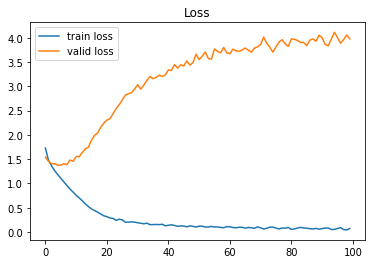

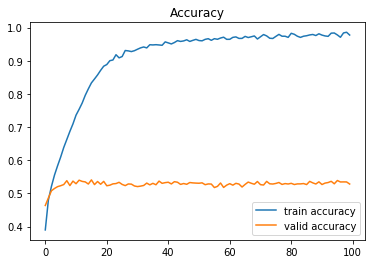

In [20]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()